In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import json
import random
import itertools

In [52]:
df = pd.concat([pd.read_csv('simulationData/sim5.csv'), pd.read_csv('simulationData/sim6.csv').iloc[246:]], axis = 0, sort = False)
df['AvgEarnings'] = pd.to_numeric(df.AvgEarnings)
df['maxIPOSpending'] = pd.to_numeric(df.maxIPOSpending)
df['SellRisk'] = pd.to_numeric(df.SellRisk)
df['BuyRisk'] = pd.to_numeric(df.BuyRisk)

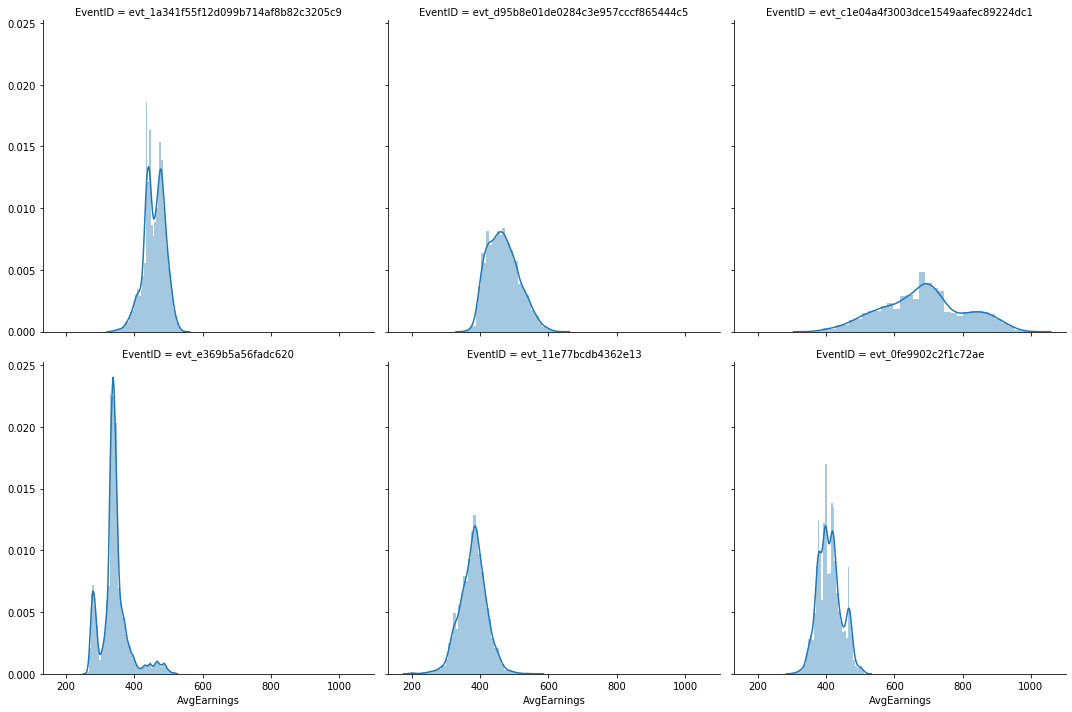

In [53]:
g = sns.FacetGrid(df, col = 'EventID', col_wrap = 3, height = 5)
g.map(
    sns.distplot,
    'AvgEarnings'
)

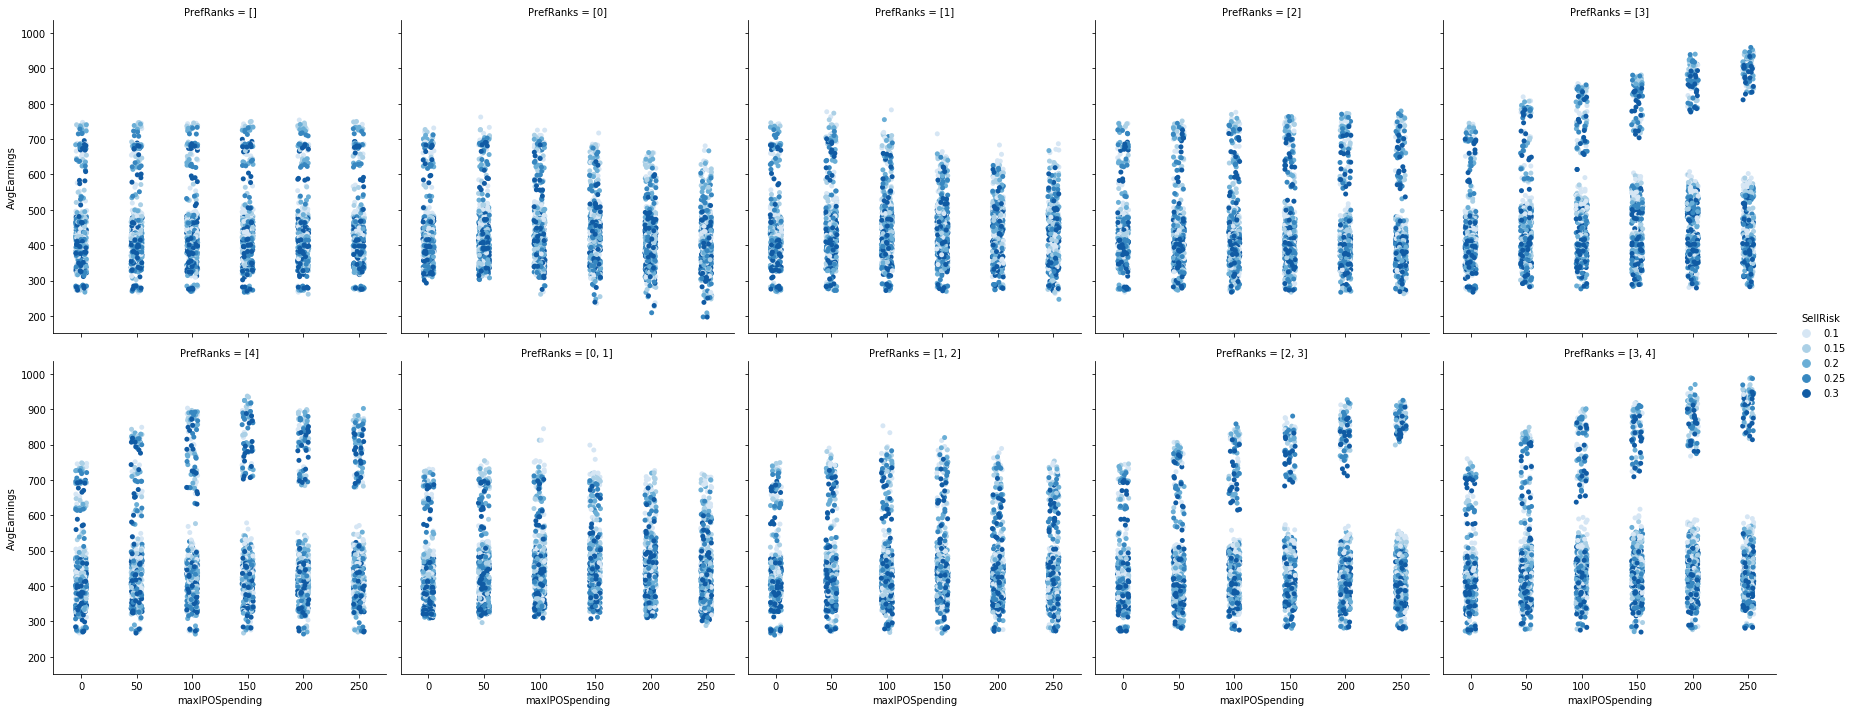

In [54]:
g = sns.catplot(x = 'maxIPOSpending', y = 'AvgEarnings', hue = 'SellRisk',col = 'PrefRanks', col_wrap = 5, palette = 'Blues', sharex = True, sharey = True, data = df)

In [55]:
e1 = "evt_1a341f55f12d099b714af8b82c3205c9"
e2 = "evt_d95b8e01de0284c3e957cccf865444c5"
e3 = "evt_c1e04a4f3003dce1549aafec89224dc1"
nflEvents = [e1, e2, e3]

e4 = "evt_e369b5a56fadc620"
e5 = "evt_11e77bcdb4362e13"
e6 = "evt_0fe9902c2f1c72ae"
nbaEvents = [e4, e5, e6]


df['Sport'] = ['NBA' if i in nbaEvents else 'NFL' for i in df.EventID]

In [56]:
adjuster = {
    '[]': 0,
    '[0]': 1,
    '[0, 1]': 2,
    '[1]': 3,
    '[1, 2]': 4,
    '[2]': 5,
    '[2, 3]': 6,
    '[3]': 7,
    '[3, 4]': 8,
    '[4]': 9
    }

df['AdjPrefRanks'] = [adjuster[i] for i in df.PrefRanks]

In [57]:
df[df.EventID.isin(nbaEvents)].corr()[['AvgEarnings']]

,AvgEarnings
maxIPOSpending,0.051229
BuyRisk,-0.285077
SellRisk,-0.067573
AvgEarnings,1.000000
AdjPrefRanks,0.136658


In [58]:
df[df.EventID.isin(nflEvents)].corr()[['AvgEarnings']]

,AvgEarnings
maxIPOSpending,0.077616
BuyRisk,0.089016
SellRisk,-0.117444
AvgEarnings,1.000000
AdjPrefRanks,0.195723


In [59]:
df.AvgEarnings.describe()

count    28800.000000
mean       457.444938
std        126.598467
min        196.904000
25%        377.128500
50%        430.009000
75%        485.906500
max        988.736000
Name: AvgEarnings, dtype: float64

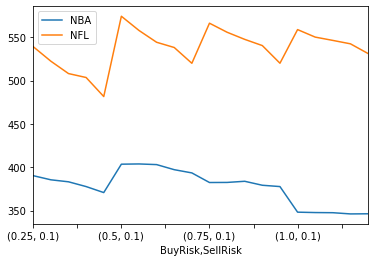

In [60]:
fig = plt.figure()
ax = fig.gca()
df.loc[df.EventID.isin(nbaEvents)].groupby(['BuyRisk', 'SellRisk']).mean()[['AvgEarnings']].plot(ax = ax)
df.loc[df.EventID.isin(nflEvents)].groupby(['BuyRisk', 'SellRisk']).mean()[['AvgEarnings']].plot(ax = ax)
ax.legend(['NBA', 'NFL'])

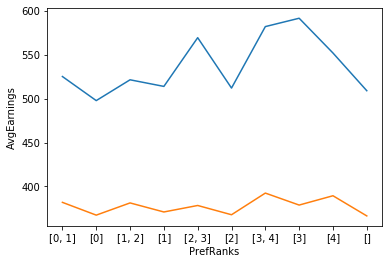

In [61]:
nfl = sns.lineplot(x = 'PrefRanks', y = 'AvgEarnings', data = df.loc[df.EventID.isin(nflEvents)].groupby('PrefRanks').mean().reset_index())
nba = sns.lineplot(x = 'PrefRanks', y = 'AvgEarnings', data = df.loc[df.EventID.isin(nbaEvents)].groupby('PrefRanks').mean().reset_index())

In [62]:
df.loc[df.EventID.isin(nbaEvents)].groupby([i for i in df.columns if i not in ['Bot', 'EventID', 'AvgEarnings']]).mean().reset_index().sort_values(by = 'AvgEarnings')

,maxIPOSpending,BuyRisk,SellRisk,PrefRanks,IPOcsv,LIVEcsv,Sport,AdjPrefRanks,AvgEarnings
1457,0,1.00,0.25,"[1, 2]",False,True,NBA,4,261.514
7755,200,1.00,0.15,[],True,True,NBA,0,261.600
4627,100,1.00,0.20,[4],True,True,NBA,9,264.366
7907,200,1.00,0.25,[4],True,True,NBA,9,264.500
6179,150,1.00,0.20,"[1, 2]",True,True,NBA,4,266.922
...,...,...,...,...,...,...,...,...,...
8768,250,0.50,0.30,"[3, 4]",False,False,NBA,8,511.572
8145,250,0.25,0.15,[4],False,True,NBA,9,515.282
8305,250,0.25,0.25,[4],False,True,NBA,9,515.816
8065,250,0.25,0.10,[4],False,True,NBA,9,515.976


In [63]:
df.loc[df.EventID.isin(nbaEvents)].groupby([i for i in df.columns if i not in ['Bot', 'EventID', 'AvgEarnings']]).mean().reset_index().sort_values(by = 'AvgEarnings')

,maxIPOSpending,BuyRisk,SellRisk,PrefRanks,IPOcsv,LIVEcsv,Sport,AdjPrefRanks,AvgEarnings
1457,0,1.00,0.25,"[1, 2]",False,True,NBA,4,261.514
7755,200,1.00,0.15,[],True,True,NBA,0,261.600
4627,100,1.00,0.20,[4],True,True,NBA,9,264.366
7907,200,1.00,0.25,[4],True,True,NBA,9,264.500
6179,150,1.00,0.20,"[1, 2]",True,True,NBA,4,266.922
...,...,...,...,...,...,...,...,...,...
8768,250,0.50,0.30,"[3, 4]",False,False,NBA,8,511.572
8145,250,0.25,0.15,[4],False,True,NBA,9,515.282
8305,250,0.25,0.25,[4],False,True,NBA,9,515.816
8065,250,0.25,0.10,[4],False,True,NBA,9,515.976


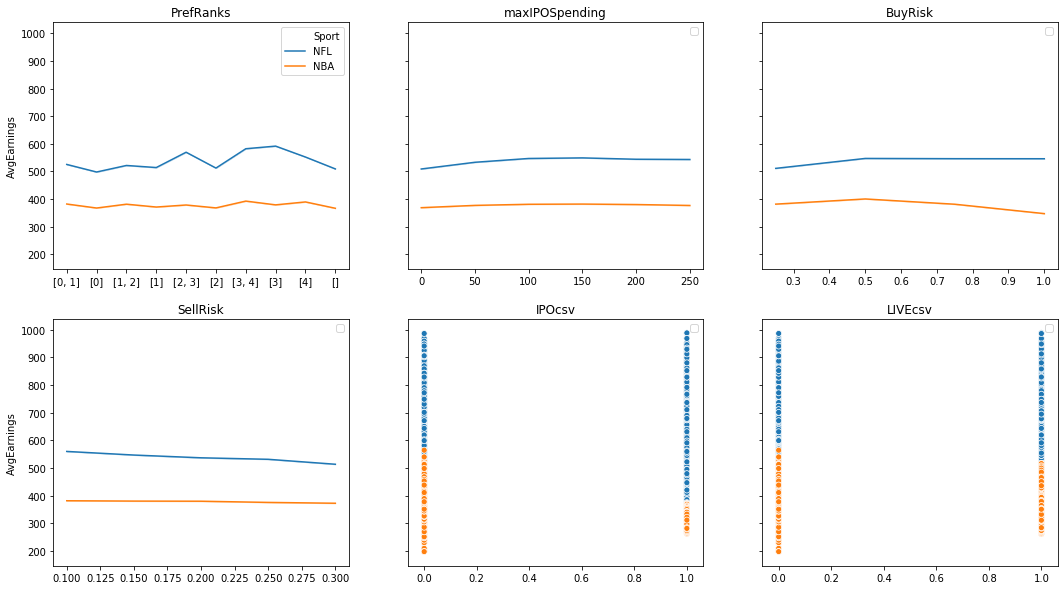

In [64]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, sharey = True, figsize = (18,10))
for e, i in enumerate(['PrefRanks', 'maxIPOSpending', 'BuyRisk', 'SellRisk', 'IPOcsv', 'LIVEcsv']):
    ax = axis.flatten()[e]
    if 'csv' not in i:
        ax = sns.lineplot(x = i, y = 'AvgEarnings', hue = 'Sport', ci= False, data = df, ax =ax)
    else:
        ax = sns.scatterplot(x = [1 if i == True else 0 for i in df[i]], y = 'AvgEarnings', hue = 'Sport', ci= False, data = df, ax =ax)
    ax.set_title(i)
    ax.set_xlabel('')
    if e != 0:
        ax.legend([])

In [65]:
from bots_with_event_simulator import Bot
from event_simulator import Simulator as sim

In [66]:
e4 = "evt_e369b5a56fadc620"
e5 = "evt_11e77bcdb4362e13"
e6 = "evt_0fe9902c2f1c72ae"

In [67]:
p = {'maxIPOSpendings': 150, 'prefRanks': [3], 'sellRisk': 0.2, 'buyRisk': 0.1, 'IPOcsv': False, 'LIVEcsv': False}
earnings =  {}

In [68]:
def simul(p):    
    l = []
    for i in nbaEvents:   
        b = Bot(p, sim(i))
        b.runBot()
        l.append(b.earnings)
        b.resetBot()
    earnings = np.mean(np.array(l))
    std = np.std(np.array(l))
    return earnings, std

In [69]:
ipospendings = [i*50 for i in range(6)]
buyRisks = [round(i*.25, 2) for i in range(1, 5)]
sellRisks = [round(i*.05, 2) for i in range(2,7)]
possible_ranks = [[], [0], [1], [2], [3], [4], [0, 1], [1,2], [2,3], [3,4]]
ipos = [True, False]
lives = [True, False]

In [70]:
def greedy_algo():
    i_ipospendings = random.choice([i for i in range(len(ipospendings))])
    i_buyRisks = random.choice([i for i in range(len(buyRisks))])
    i_sellRisks = random.choice([i for i in range(len(sellRisks))])
    i_posRanks = random.choice([i for i in range(len(possible_ranks))])
    i_ipos, i_lives = random.choice([0, 1]), random.choice([0, 1])
    
    iterables = [arg for arg in itertools.product(
        [ipospendings[i] if i < len(ipospendings) else ipospendings[i - len(ipospendings)] for i in range(i_ipospendings - 1, i_ipospendings + 2)],
        [buyRisks[i] if i < len(buyRisks) else buyRisks[i - len(buyRisks)] for i in range(i_buyRisks - 1, i_buyRisks + 2)],
        [sellRisks[i] if i < len(sellRisks) else sellRisks[i - len(sellRisks)] for i in range(i_sellRisks - 1, i_sellRisks + 2)],
        [possible_ranks[i] if i < len(possible_ranks) else possible_ranks[i - len(possible_ranks)] for i in range(i_posRanks - 1, i_posRanks + 2)],
        [ipos[i_ipos]],
        [lives[i_lives]]
    )]

    print(f'number of iterations needed: {len(iterables)}')

    max_earnings = None
    max_earnings_p = None
    max_earnings_stdev = None
    low_stdev = None
    low_stdev_p = None
    low_stdev_earnings = None
    d = {}
    for e, i in enumerate(iterables):
        p = {'maxIPOSpending': i[0], 'buyRisk': i[1], 'sellRisk': i[2], 'prefRanks': i[3], 'IPOcsv': i[4], 'LIVEcsv': i[5]}
        earnings, stdev = simul(p)
        d[e] = {'params': p, 'earnings': earnings, 'stdev': stdev}
        if max_earnings == None or earnings > max_earnings:
            max_earnings = earnings
            max_earnings_p = p
            max_earnings_stdev = stdev
        if low_stdev == None or stdev < low_stdev:
            low_stdev = stdev
            low_stdev_p = p
            low_stdev_earnings = earnings

    return d